# Car Price Prediction::

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

# New Section

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [ ]:
import pandas as pd
import numpy as np
import tensorflow

In [ ]:
df1 = pd.read_csv("CarPrice_Assignment.csv")

In [ ]:
df1.shape

(205, 26)

In [ ]:
df1.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
df1 =df1.drop(["car_ID","symboling","CarName"],axis=1)



In [ ]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    object 
 1   aspiration        205 non-null    object 
 2   doornumber        205 non-null    object 
 3   carbody           205 non-null    object 
 4   drivewheel        205 non-null    object 
 5   enginelocation    205 non-null    object 
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    object 
 12  cylindernumber    205 non-null    object 
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    object 
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [ ]:
#2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
missing =df1.apply(lambda x: x.isna().sum() )
missing

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df1.corr()['price'].sort_values()   

#price has good correlation with
#boreratio : 0.553173
#wheelbase : 0.577816
#carlength : 0.682920
#carwidth  : 0.759325
#horsepower : 0.808139 high relation with price
#curbweight: 0.835305  high relation with price
#enginesize :  0.874145 high relation with price

highwaympg         -0.697599
citympg            -0.685751
peakrpm            -0.085267
compressionratio    0.067984
stroke              0.079443
carheight           0.119336
boreratio           0.553173
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
horsepower          0.808139
curbweight          0.835305
enginesize          0.874145
price               1.000000
Name: price, dtype: float64

In [ ]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'price')

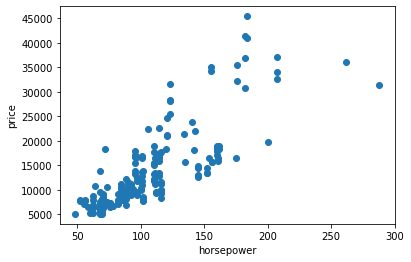

In [ ]:
plt.scatter(data =df1, x="horsepower", y="price")
plt.xlabel("horsepower")
plt.ylabel("price")

Text(0, 0.5, 'price')

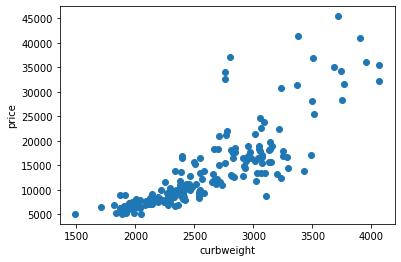

In [ ]:
plt.scatter(data =df1, x="curbweight", y="price")
plt.xlabel("curbweight")
plt.ylabel("price")

Text(0, 0.5, 'price')

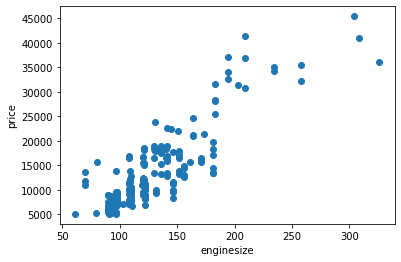

In [ ]:
plt.scatter(data =df1, x="enginesize", y="price")
plt.xlabel("enginesize")
plt.ylabel("price")

In [ ]:
df1.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
### 75% of car's price is 16503.00 and max price goes upto 45400.00. let's check th outliers.
df1=df1[df1["price"] <40000.00].reset_index(drop =True)


In [ ]:
### 75% of horsepower is 116 and max goes upto 288. let's check th outliers.
df1=df1[df1["horsepower"] < 200].reset_index(drop =True)


In [ ]:
### 75% of curbweight is 2935 and max goes upto 4066. let's check th outliers.
df1=df1[df1["curbweight"] <3800 ].reset_index(drop =True)



In [ ]:
### 75% of enginesize is 141 and max goes upto 326. let's check th outliers.
df1=df1[df1["enginesize"] <210 ].reset_index(drop =True)


In [ ]:
df1.shape

(192, 23)

In [ ]:
#2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
missing =df1.apply(lambda x: x.isna().sum() )
missing

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
df1.to_csv("cleaned_car_data.csv")   # Saving cleaned data in a separate csv file


In [ ]:
#Categorical data processing because following are object type like
# 1    CarName           192 non-null    object 
# 2   fueltype          192 non-null    object 
# 3   aspiration        192 non-null    object 
# 4   doornumber        192 non-null    object 
# 5   carbody           192 non-null    object 
# 6   drivewheel        192 non-null    object    and more .....

df1_obj_columns = df1.select_dtypes(include ="object")
df1_numerical_columns = df1.select_dtypes(exclude ="object")
 

In [ ]:
#2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )
missing =df1.apply(lambda x: x.isna().sum() )
missing

fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
# make obj columns to numerical columns using get_dummies
df1_obj_dummies = pd.get_dummies(df1_obj_columns, drop_first= True)
df1_obj_dummies

,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
188,1,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0
189,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0
190,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [ ]:
final_df1 = pd.concat([df1_numerical_columns,df1_obj_dummies],axis =1)


In [ ]:
final_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   wheelbase             192 non-null    float64
 1   carlength             192 non-null    float64
 2   carwidth              192 non-null    float64
 3   carheight             192 non-null    float64
 4   curbweight            192 non-null    int64  
 5   enginesize            192 non-null    int64  
 6   boreratio             192 non-null    float64
 7   stroke                192 non-null    float64
 8   compressionratio      192 non-null    float64
 9   horsepower            192 non-null    int64  
 10  peakrpm               192 non-null    int64  
 11  citympg               192 non-null    int64  
 12  highwaympg            192 non-null    int64  
 13  price                 192 non-null    float64
 14  fueltype_gas          192 non-null    uint8  
 15  aspiration_turbo      1

In [ ]:
final_df1.corr()["price"].sort_values(ascending =False)

price                   1.000000
curbweight              0.848747
carwidth                0.793310
enginesize              0.782213
carlength               0.743516
horsepower              0.738631
wheelbase               0.702823
drivewheel_rwd          0.623454
boreratio               0.501344
fuelsystem_mpfi         0.485664
cylindernumber_six      0.442969
aspiration_turbo        0.378110
carheight               0.295405
fuelsystem_idi          0.246099
compressionratio        0.193320
carbody_sedan           0.176346
enginetype_ohcv         0.160832
enginetype_l            0.130429
stroke                  0.111582
carbody_wagon           0.039326
carbody_hardtop         0.039157
cylindernumber_two      0.031736
enginetype_rotor        0.031736
fuelsystem_mfi          0.015018
fuelsystem_4bbl         0.007690
fuelsystem_spfi        -0.009783
fuelsystem_spdi        -0.032267
cylindernumber_three   -0.086114
peakrpm                -0.126538
enginetype_ohc         -0.139695
enginetype

In [ ]:
x = final_df1.drop(columns ="price")     #all are features except "price"
y = final_df1["price"]                     # prediction is price
x=np.array(x)
y=np.array(y)

In [ ]:
### 3. Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).
from sklearn.model_selection import train_test_split
# Defines ratios, w.r.t. whole dataset.
ratio_train = 0.5
ratio_val = 0.2
ratio_test = 0.3

# Produces test split.
x_remaining, x_test, y_remaining, y_test = train_test_split(x, y, test_size=ratio_test, random_state =2)

# Adjusts val ratio, w.r.t. remaining dataset.
ratio_remaining = 1 - ratio_test
ratio_val_adjusted = ratio_val / ratio_remaining

# Produces train and val splits.
x_train, x_val, y_train, y_val = train_test_split(
    x_remaining, y_remaining, test_size=ratio_val_adjusted)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(x_val.shape)
print(y_val.shape)

(95, 38)
(95,)
(58, 38)
(58,)
(39, 38)
(39,)


In [ ]:
x_train.ndim

2

In [ ]:
### Normalizing the  Data
mean = x_train.mean(axis = 0)
x_train = x_train- mean
std = x_train.std(axis =0) + 0.000000001                          
x_train /= std           # normalizing train data   

x_test -= mean          # normalizing test data
x_test /= std

x_val -= mean            # normalizing validation data
x_val /= std

In [ ]:
#### 4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

####5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
import tensorflow as tf


def build_model():
  model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu', input_shape=(x_train.shape[1], )),
    
    tf.keras.layers.Dense(128, activation='relu'),
    
    tf.keras.layers.Dense(16, activation='relu'),
    
    tf.keras.layers.Dense(1)
  ])
  optimizer = tf.keras.optimizers

  model.compile(loss='mse',
                optimizer="rmsprop",
                metrics=['mae'])
  return model

In [ ]:
import tensorflow as tf

### 6.Train the Model with Epochs (100) and validate it
all_scores =[]
all_mae_histories = []

num_epochs =200

model = build_model()
history =model.fit(x_train, y_train, validation_data=(x_val,y_val),
epochs=num_epochs, batch_size=16, verbose=1)









Epoch 1/200
6/6 [==============================] - 1s 39ms/step - loss: 142161485.7143 - mae: 11185.6122 - val_loss: 5816249007210496.0000 - val_mae: 12224520.0000
Epoch 2/200
6/6 [==============================] - 0s 12ms/step - loss: 128353944.0000 - mae: 10529.5608 - val_loss: 39022161591009280.0000 - val_mae: 31644210.0000
Epoch 3/200
6/6 [==============================] - 0s 12ms/step - loss: 128790773.7143 - mae: 10577.7653 - val_loss: 127362109792059392.0000 - val_mae: 57158700.0000
Epoch 4/200
6/6 [==============================] - 0s 11ms/step - loss: 133201069.7143 - mae: 10687.2736 - val_loss: 307540858352173056.0000 - val_mae: 88813680.0000
Epoch 5/200
6/6 [==============================] - 0s 11ms/step - loss: 147095888.0000 - mae: 11118.8444 - val_loss: 619138433574502400.0000 - val_mae: 126009800.0000
Epoch 6/200
6/6 [==============================] - 0s 11ms/step - loss: 131945325.7143 - mae: 10691.1144 - val_loss: 1133905451004461056.0000 - val_mae: 170524848.0000
Epoc

In [ ]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 256)               9984      
_________________________________________________________________
dense_73 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_74 (Dense)             (None, 16)                2064      
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 17        
Total params: 44,961
Trainable params: 44,961
Non-trainable params: 0
_________________________________________________________________


In [ ]:
hist_dic =history.history
hist_dic.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

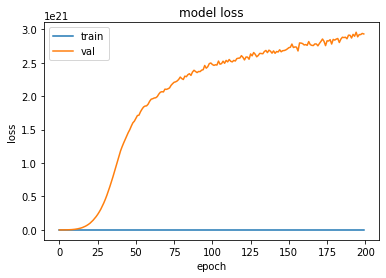

In [ ]:
import matplotlib.pyplot as plt


plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()


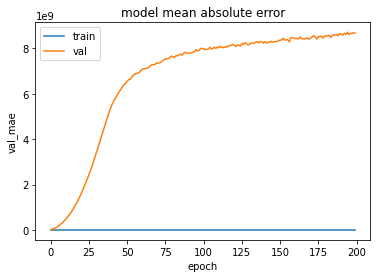

In [ ]:
plt.figure()
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('model mean absolute error')
plt.ylabel('val_mae')
plt.xlabel('epoch')
plt.legend(['train','val'], loc = 'upper left')
plt.show()